# Guess the Product

In [29]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
Train_data = pd.read_csv('train_set.csv')
Train_data.head()
Train_data

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376
...,...,...,...,...,...,...
5283,23004,VENDOR-2117,GL-6101400,14.17,General Contractor General Requirements Final ...,CLASS-1522
5284,23005,VENDOR-1736,GL-2182000,84.88,Human Resources Corporate Services Contingent ...,CLASS-1376
5285,23007,VENDOR-2226,GL-6050310,94.78,Logistics Transportation Services Parcel/Posta...,CLASS-1870
5286,23008,VENDOR-1036,GL-6100500,57.01,2005Sep Addmaster Corp Magazines Media Buy - T...,CLASS-1721


In [31]:
Train_data.loc[(Train_data['Vendor_Code'] == 'VENDOR-1676') & (Train_data['GL_Code'] == 'GL-6100410')]

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
87,15129,VENDOR-1676,GL-6100410,82.52,Production Artworking/Typesetting Prototype an...,CLASS-1963
340,15504,VENDOR-1676,GL-6100410,5.56,SMAP Artworking/Typesetting Champion Parts Inc...,CLASS-1963
430,15641,VENDOR-1676,GL-6100410,32.24,SMAP Prototype and Comp Production/Packaging D...,CLASS-1963
573,15860,VENDOR-1676,GL-6100410,63.96,SMAP Prototype and Comp Production/Packaging D...,CLASS-1963
...,...,...,...,...,...,...
4836,22322,VENDOR-1676,GL-6100410,23.95,Prototype and Comp Production/Packaging Design...,CLASS-1963
4902,22420,VENDOR-1676,GL-6100410,97.24,Dec-2009 Champion Parts Inc Prototype and Comp...,CLASS-1963
4989,22552,VENDOR-1676,GL-6100410,53.26,SMAP Prototype and Comp Production/Packaging D...,CLASS-1963
5094,22701,VENDOR-1676,GL-6100410,80.94,Champion Parts Inc Oct-2016 SMAP Production Ar...,CLASS-1963


### Exploratory Data Analysis

In [32]:
Train_data.shape

(5288, 6)

In [33]:
Train_data['Product_Category'].nunique()

36

In [34]:
Train_data['Product_Category'].value_counts()

CLASS-1758    1421
CLASS-1274     939
CLASS-1522     803
CLASS-1250     440
CLASS-1376     347
CLASS-1963     215
CLASS-1249     167
CLASS-1828     107
CLASS-2141     103
CLASS-1721     103
CLASS-1567      80
CLASS-1919      61
CLASS-2112      52
CLASS-1850      51
CLASS-1477      48
CLASS-2241      36
CLASS-1870      35
CLASS-1309      31
CLASS-2003      31
CLASS-1429      30
CLASS-1322      28
CLASS-1964      27
CLASS-1294      24
CLASS-1770      19
CLASS-1983      16
CLASS-1867      15
CLASS-1652      14
CLASS-2038      13
CLASS-1805      10
CLASS-2152       9
CLASS-1688       4
CLASS-1248       4
CLASS-2146       2
CLASS-1957       1
CLASS-2015       1
CLASS-1838       1
Name: Product_Category, dtype: int64

In [35]:
Train_data.isnull().sum()

Inv_Id              0
Vendor_Code         0
GL_Code             0
Inv_Amt             0
Item_Description    0
Product_Category    0
dtype: int64

In [36]:
' '.join(Train_data['Item_Description'])

"Artworking/Typesetting Production Jun 2009 Champion Parts Inc SMAP Prototype and Comp Production/Packaging Design Auto Leasing Corporate Services Corning Inc /Ny 2013-Mar  Auto Leasing and Maintenance Other Corporate Services Store Management Lease/Rent Deltona Corp Real Estate Base Rent Jul2018 Store Construction General Requirements Colonial Trust Iii General Contractor Final Site Clean Up 2005-Dec  Jul 2015 Aydin Corp Contingent Labor/Temp Labor Contingent Labor/Temp Labor Corporate Services Human Resources Final Site Clean Up 2018Mar Store Construction Dravo Corp General Contractor General Requirements Travel and Entertainment Miscellaneous Company Car (Field Only) Texas New Mexico Power Co Ground Transportation Miscellaneous Company Car (Field Only) 2011-Mar  General Contractor General Requirements Final Site Clean Up American Pad & Paper Co Apr2014 Store Construction Aquila Distributors Inc                                 /Bd Prototype and Comp Production/Packaging Design Jul 20

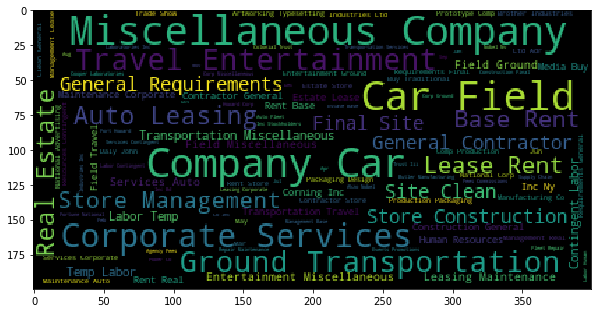

In [37]:
wc = WordCloud().generate(' '.join(Train_data['Item_Description']))
plt.figure(figsize=(10,10))
plt.imshow(wc)

In [38]:
ps = PorterStemmer()
corpus = []

for i in range(0, Train_data.shape[0]):  #Iterate through dataframe of series of data
    review = re.sub('[^a-zA-Z]', ' ', Train_data['Item_Description'][i]) # Filter each index string
    review = review.lower()
    review = review.split()   # split the word based on the space delimeter
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)  # join each words with space delimeter in between and converted as sentence 
    corpus.append(review)
corpus

['artwork typeset product jun champion part inc smap prototyp comp product packag design',
 'auto leas corpor servic corn inc ny mar auto leas mainten corpor servic',
 'store manag leas rent deltona corp real estat base rent jul',
 'store construct gener requir coloni trust iii gener contractor final site clean dec',
 'jul aydin corp conting labor temp labor conting labor temp labor corpor servic human resourc',
 'final site clean mar store construct dravo corp gener contractor gener requir',
 'travel entertain miscellan compani car field texa new mexico power co ground transport miscellan compani car field mar',
 'gener contractor gener requir final site clean american pad paper co apr store construct',
 'aquila distributor inc bd prototyp comp product packag design jul artwork typeset product smap',
 'base rent store manag chicago rivet machin co dec leas rent real estat',
 'ground transport travel entertain miscellan compani car field miscellan compani car field may fortun nation co

In [39]:
' '.join(corpus)

'artwork typeset product jun champion part inc smap prototyp comp product packag design auto leas corpor servic corn inc ny mar auto leas mainten corpor servic store manag leas rent deltona corp real estat base rent jul store construct gener requir coloni trust iii gener contractor final site clean dec jul aydin corp conting labor temp labor conting labor temp labor corpor servic human resourc final site clean mar store construct dravo corp gener contractor gener requir travel entertain miscellan compani car field texa new mexico power co ground transport miscellan compani car field mar gener contractor gener requir final site clean american pad paper co apr store construct aquila distributor inc bd prototyp comp product packag design jul artwork typeset product smap base rent store manag chicago rivet machin co dec leas rent real estat ground transport travel entertain miscellan compani car field miscellan compani car field may fortun nation corp base rent store manag bio rad laborato

In [40]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

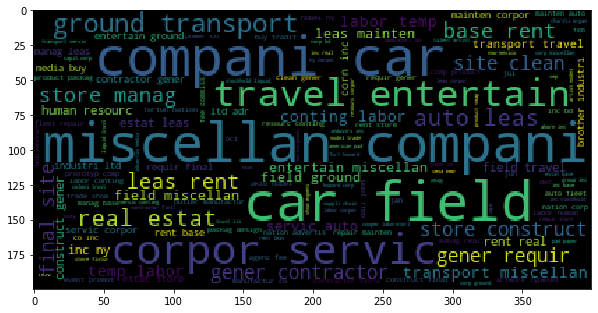

In [41]:
wc = WordCloud().generate(' '.join(corpus))
plt.figure(figsize=(10,10))
plt.imshow(wc)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(corpus)
print('Shape of the document matrix:', x.shape)
vocabulary = vectorizer.vocabulary_
vocabulary 

Shape of the document matrix: (5288, 1455)


{'artwork': 165,
 'typeset': 1404,
 'product': 1227,
 'jun': 1026,
 'champion': 433,
 'part': 1186,
 'inc': 993,
 'smap': 1311,
 'prototyp': 1232,
 'comp': 522,
 'packag': 1180,
 'design': 655,
 'auto': 189,
 'leas': 1051,
 'corpor': 560,
 'servic': 1300,
 'corn': 558,
 'ny': 1160,
 'mar': 1092,
 'mainten': 1086,
 'store': 1339,
 'manag': 1088,
 'rent': 1255,
 'deltona': 646,
 'corp': 559,
 'real': 1246,
 'estat': 800,
 'base': 235,
 'jul': 1025,
 'construct': 542,
 'gener': 929,
 'requir': 1258,
 'coloni': 506,
 'trust': 1399,
 'iii': 989,
 'contractor': 549,
 'final': 860,
 'site': 1310,
 'clean': 476,
 'dec': 636,
 'aydin': 200,
 'conting': 548,
 'labor': 1038,
 'temp': 1366,
 'human': 980,
 'resourc': 1260,
 'dravo': 709,
 'travel': 1394,
 'entertain': 783,
 'miscellan': 1122,
 'compani': 523,
 'car': 390,
 'field': 855,
 'texa': 1369,
 'new': 1146,
 'mexico': 1109,
 'power': 1217,
 'co': 486,
 'ground': 946,
 'transport': 1392,
 'american': 106,
 'pad': 1181,
 'paper': 1184,
 'apr

In [43]:
pd.DataFrame( vocabulary.values(), index = vocabulary.keys(), columns=['COUNT'] ).sort_values(by = 'COUNT', ascending= False)

,COUNT
york,1454
yeager,1453
yanke,1452
wright,1451
wr,1450
...,...
abel,4
abco,3
abc,2
abbott,1


In [44]:
feature_names = vectorizer.get_feature_names()
print(feature_names)

['ab', 'abbott', 'abc', 'abco', 'abel', 'aberdeen', 'abraham', 'abram', 'academ', 'access', 'accid', 'account', 'accru', 'accu', 'accum', 'accumul', 'ace', 'acf', 'acm', 'acmat', 'acmc', 'acorn', 'acterna', 'action', 'actuant', 'adag', 'adam', 'addmast', 'administr', 'adr', 'adv', 'advanc', 'advantag', 'advanzeon', 'advertis', 'advis', 'advisor', 'aeir', 'aep', 'aeroson', 'aerotelesi', 'aerovox', 'aesthet', 'afa', 'affili', 'afrikand', 'agenc', 'agf', 'agl', 'agnico', 'agricultur', 'agway', 'aig', 'air', 'airborn', 'airlin', 'airtex', 'akorn', 'akteingesellschaft', 'akzo', 'al', 'alabama', 'alaska', 'alba', 'albert', 'albertson', 'alcan', 'alco', 'alcoa', 'alen', 'alenick', 'alexand', 'alfa', 'alger', 'algonquin', 'alico', 'allan', 'allciti', 'alleco', 'allegheni', 'allen', 'alli', 'allianc', 'allison', 'alpha', 'altobelli', 'altoona', 'aluminium', 'aluminum', 'alza', 'amacan', 'amana', 'amax', 'ambas', 'ambassador', 'amcast', 'amcomp', 'amcord', 'amdahl', 'ame', 'amelco', 'amerac', 'a

In [19]:
x[0]

<1x1455 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [57]:
x[0].todense().shape

(1, 1455)

In [58]:
x[0].todense().T.shape

(1455, 1)

In [65]:
x[0].todense().T.ndim

2

In [20]:
first_document_vector=x[0]

#Print the TF-IDF values of the first row
df = pd.DataFrame(first_document_vector.T.todense(),index=feature_names,columns=['Tf-Idf'])
df.sort_values(by=['Tf-Idf'],ascending = False)

,Tf-Idf
product,0.452677
part,0.353430
champion,0.346573
packag,0.273236
design,0.273236
...,...
cna,0.000000
cn,0.000000
cml,0.000000
club,0.000000


In [30]:
x

<5288x1455 sparse matrix of type '<class 'numpy.float64'>'
	with 61104 stored elements in Compressed Sparse Row format>

In [24]:
X = pd.DataFrame.sparse.from_spmatrix(x)
#Inv_Df = pd.DataFrame(Train_data['Inv_Amt'])
#X = pd.concat([x, Inv_Df] , axis = 1)
X

,0,1,2,3,4,5,6,7,8,9,...,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:

class_encodingmap ={
                    'CLASS-1758': 0,  'CLASS-1274': 1,  'CLASS-1522': 2,  'CLASS-1250': 3,  'CLASS-1376': 4,  
                    'CLASS-1963': 5,  'CLASS-1249': 6,  'CLASS-1828': 7,  'CLASS-2141': 8,  'CLASS-1721': 9,  
                    'CLASS-1567': 10, 'CLASS-1919': 11, 'CLASS-2112': 12, 'CLASS-1850': 13, 'CLASS-1477': 14,  
                    'CLASS-2241': 15, 'CLASS-1870': 16, 'CLASS-2003': 17, 'CLASS-1309': 18, 'CLASS-1429': 19, 
                    'CLASS-1322': 20, 'CLASS-1964': 21, 'CLASS-1294': 22, 'CLASS-1770': 23, 'CLASS-1983': 24,  
                    'CLASS-1867': 25, 'CLASS-1652': 26, 'CLASS-2038': 27, 'CLASS-1805': 28, 'CLASS-2152': 29,
                    'CLASS-1688': 30, 'CLASS-1248': 31, 'CLASS-2146': 32, 'CLASS-1957': 33,  'CLASS-1838': 34,  
                    'CLASS-2015': 35 
                    }
Y = Train_data['Product_Category'].map(class_encodingmap)

In [26]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

### Model Building

In [27]:
# Training the model using Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
Product_detect_model = MultinomialNB().fit(X_train, y_train)
#Predicting the Product class using Naive bayes classifier
y_pred=Product_detect_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 7, 1, 9], dtype=int64)

### Model Evaluation

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
CM = confusion_matrix(y_test,y_pred)
print('Accuracy Score:', accuracy_score(y_test,y_pred))
CR = classification_report(y_test,y_pred)
print("Confusion Matrix :\n", CM)
print("Precision recall report :\n", CR)

Accuracy Score: 0.9612476370510397
Confusion Matrix :
 [[289   0   0 ...   0   0   0]
 [  0 204   0 ...   0   0   0]
 [  0   0 157 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Precision recall report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       0.98      1.00      0.99       204
           2       0.98      1.00      0.99       157
           3       0.98      1.00      0.99        88
           4       0.97      1.00      0.99        72
           5       1.00      1.00      1.00        43
           6       1.00      0.97      0.99        36
           7       0.67      1.00      0.80        16
           8       1.00      1.00      1.00        22
           9       0.62      1.00      0.77        20
          10       1.00      1.00      1.00        11
          11       0.67      1.00      0.80         8
          12       1.00

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Code Pipeline for Test Data

In [36]:
Test_data = pd.read_csv('train_set.csv')

corpus = []

for i in range(0, Test_data.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', Train_data['Item_Description'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

X_TestData = vectorizer.fit_transform(corpus)
Y_TestData = Product_detect_model.predict(X_TestData)
print('Predicted Product Category:', Y_TestData)

Predicted Product Category: [ 5  3  1 ... 16  9  1]
